#ANALIZA

Za projektno nalogo sem se odločila analizirati podatke o NBA igralcih v sezoni 2023/24. Podatki so objavljeni na spletni strani [basketball-reference.com](https://www.basketball-reference.com/leagues/NBA_2024_totals.html).

V tabeli s podatki so nekateri igralci napisani večkrat, ker so v tej sezoni igrali pri več ekipah. Najprej si oglejmo tabelo.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
plt.style.use("ggplot")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#008080'])

nba = pd.read_csv('NBA.csv', encoding="utf-8", index_col="Rk")
nba = nba.drop_duplicates(keep=False)       #da se zbisejo une vrstice
nba

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,.501,...,.616,191,296,487,97,46,68,83,143,565
1,Precious Achiuwa,C,24,TOR,25,0,437,78,170,.459,...,.571,50,86,136,44,16,12,29,40,193
1,Precious Achiuwa,PF,24,NYK,49,18,1187,157,299,.525,...,.643,141,210,351,53,30,56,54,103,372
2,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,.521,...,.755,159,578,737,278,81,66,162,159,1367
3,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,.411,...,.661,74,142,216,83,47,44,64,117,455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,Thaddeus Young,PF,35,PHO,10,0,89,11,21,.524,...,.333,17,11,28,7,5,2,4,11,23
569,Trae Young,PG,25,ATL,54,54,1942,433,1008,.430,...,.855,23,126,149,583,72,11,235,109,1389
570,Omer Yurtseven,C,25,UTA,48,12,545,99,184,.538,...,.679,72,136,208,29,8,18,37,52,222


Za začetek izbrišimo stolpce s podatki v obliki procentov, ker jih ne potrebujemo in jih lahko izračunamo tudi sami. 
Med podatki so tudi vrstice, ki za igralce pri več ekipah izračunajo vsoto vendar nas ta podatek ne zanima, zato tudi te izbrišemo.


In [75]:
nba = nba.drop(columns=["FG%", "3P%", "2P%", "eFG%", "FT%"])
nba = nba[nba["Tm"].str.contains("TOT") == False]

Podatki v tabeli so najprej v obliki "stringov" zato jih moramo spremeniti v numerične, da jih lahko analiziramo.

In [76]:
NUMERIC_COLS = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 
       '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

nba_num = nba[NUMERIC_COLS]

nba_num = nba_num.apply(pd.to_numeric, errors='coerce').fillna(nba_num) # pretvorimo numerične iz str v stevilke



# dodamo numerične nazaj
nba[NUMERIC_COLS] = nba_num 

nba.dtypes

Player    object
Pos       object
Age        int64
Tm        object
G          int64
GS         int64
MP         int64
FG         int64
FGA        int64
3P         int64
3PA        int64
2P         int64
2PA        int64
FT         int64
FTA        int64
ORB        int64
DRB        int64
TRB        int64
AST        int64
STL        int64
BLK        int64
TOV        int64
PF         int64
PTS        int64
dtype: object

Vidimo, da so podatki pravilne oblike, torej jih lahko začnemo analizirati. Oglejmo si najprej, kaj nam pokaže prvih 10 vrstic tabele.

In [77]:
nba.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,24,TOR,25,0,437,78,170,13,...,42,50,86,136,44,16,12,29,40,193
1,Precious Achiuwa,PF,24,NYK,49,18,1187,157,299,13,...,70,141,210,351,53,30,56,54,103,372
2,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,15,...,387,159,578,737,278,81,66,162,159,1367
3,Ochai Agbaji,SG,23,UTA,51,10,1003,106,249,47,...,20,35,91,126,47,27,29,34,66,274
3,Ochai Agbaji,SG,23,TOR,27,18,638,72,184,15,...,36,39,51,90,36,20,15,30,51,181
4,Santi Aldama,PF,23,MEM,61,35,1618,247,568,106,...,87,72,280,352,138,43,54,69,89,654
5,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,131,...,65,35,132,167,204,64,42,76,143,655
6,Grayson Allen,SG,28,PHO,75,74,2513,340,682,205,...,147,48,247,295,227,69,45,95,157,1014
7,Jarrett Allen,C,25,CLE,77,77,2442,519,819,0,...,314,243,568,811,210,53,81,121,147,1271


Opazimo, da so razporejeni po abecedi, kar nam nič ne pove. Uredimo jih po največ doseženih točkah.

In [78]:
urejeni_tocke = nba.sort_values(['PTS'], ascending=False).head(15)
urejeni_tocke[["Player", "PTS", "Tm"]]

,Player,PTS,Tm
Rk,,,
128,Luka Dončić,2370,DAL
172,Shai Gilgeous-Alexander,2254,OKC
11,Giannis Antetokounmpo,2222,MIL
76,Jalen Brunson,2212,NYK
263,Nikola Jokić,2085,DEN
140,Anthony Edwards,2049,MIN
137,Kevin Durant,2032,PHO
489,Jayson Tatum,1987,BOS
155,De'Aaron Fox,1966,SAC


Na prvem mestu po številu točk je očitno Slovenec Luka Dončić. Poglejmo si še, kateri igralci so zadeli največ košev za tri točke in jih razvrstimo od najmlajšega proti najstarejšemu.

In [79]:
urejeno_trojke = nba[nba["3P"] >= 210].sort_values("Age")
urejeno_trojke[['Player','3P','Age']]

,Player,3P,Age
Rk,,,
324,Tyrese Maxey,212,23
128,Luka Dončić,284,24
489,Jayson Tatum,229,25
406,Michael Porter Jr.,220,25
155,De'Aaron Fox,214,26
38,Malik Beasley,224,27
61,Mikal Bridges,220,27
76,Jalen Brunson,211,27
442,D'Angelo Russell,226,27


Vidimo, da ima Stephen Curry ogromno prednost pred ostalimi, čeprav je najstarjši med vsemi igralci v zgornji tabeli.
Zanima nas, katera starost prevladuje na igrišču.

Text(0.5, 1.0, 'Igralci po starosti')

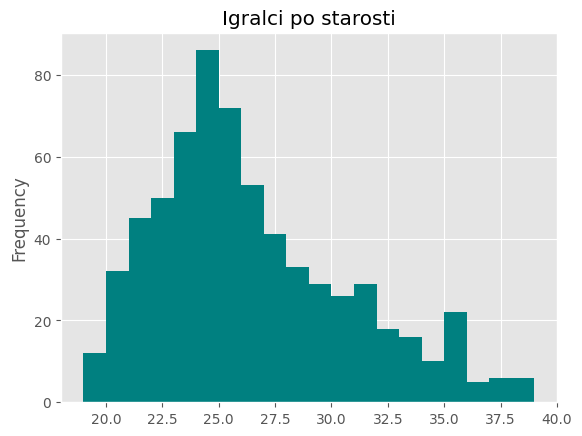

In [80]:
nba["Age"].plot.hist(bins=20)
#plt.xticks(np.arange(0,10))
plt.title("Igralci po starosti")

Iz grafa je vidno, da je največ igralcev starih med 22 in 27 let.

V NBA ligi igra 30 različnih ekip. Poglejmo si najprej, katere so te ekipe.

In [108]:
ekipe = nba["Tm"]
ekipe = set(ekipe)
ekipe


{'ATL',
 'BOS',
 'BRK',
 'CHI',
 'CHO',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHO',
 'POR',
 'SAC',
 'SAS',
 'TOR',
 'UTA',
 'WAS'}

Za naključno ekipo si oglejmo, kateri so njeni igralci in kateri izmed njih je najbolj "zanesljiv" (tisti, ki mu zaupajo največ minut na igriščču).

In [82]:
bucks = nba[nba['Tm'].str.contains('MIL')]
bucks_urejeno = bucks.sort_values("MP", ascending=False)
bucks_urejeno[["Player", "MP"]]

,Player,MP
Rk,,
298,Damian Lillard,2579
11,Giannis Antetokounmpo,2567
305,Brook Lopez,2411
38,Malik Beasley,2337
408,Bobby Portis,2008
105,Pat Connaughton,1676
340,Khris Middleton,1487
110,Jae Crowder,1156
391,Cameron Payne,702


Zgoraj so podatki o igralcih ekipe Milwaukee Bucks, za vse ostale bi preverili na isti način.

Zanimiv podatek za analizo, je tudi število osebnih napak košarkašev. Najprej poglejmo, kateri igralec je imel v sezoni 2023/24 največ osebnih napak, potem pa si bomo ogledali še, kateri drugi podatki vplivajo na to število.

In [110]:
najvec_os_napak_id = nba["PF"].idxmax()
najvec_os_napak_igralec = nba.loc[najvec_os_napak_id]
najvec_os_napak_igralec[["Player", "Age", "Pos", "Tm", "PF"]].to_frame().T


,Player,Age,Pos,Tm,PF
379,Jusuf Nurkić,29,C,PHO,254


Najprej narišimo graf, ki prikazuje število osebnih napak v odvisnosti od starosti igralcev.

Text(0.5, 1.0, 'Razmerje med starostjo in št. osebnih napak')

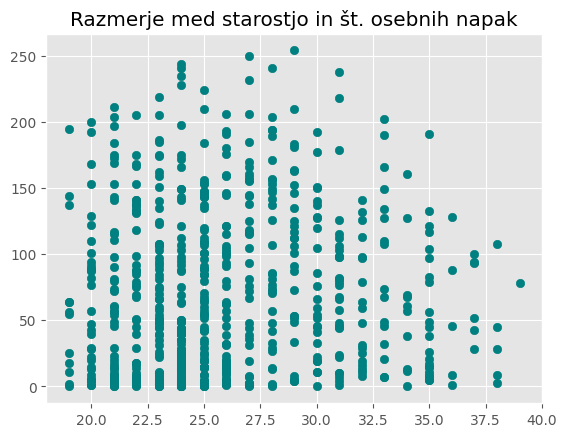

In [111]:
plt.scatter(nba["Age"], nba["PF"])
plt.title("Razmerje med starostjo in št. osebnih napak")

Žal nam ta graf ne pove veliko, kar pomeni, da starost nima vpliva na to. Oglejmo si, kako na to vpliva število točk posameznih igralcev.

Text(0.5, 1.0, 'Razmerje med številom točk in osebnih napak')

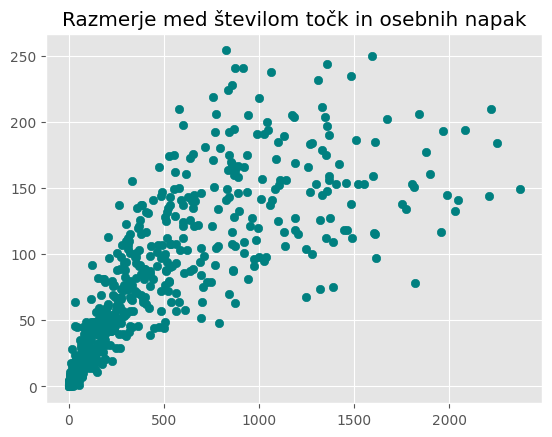

In [97]:
plt.scatter(nba["PTS"], nba["PF"])
plt.title("Razmerje med številom točk in osebnih napak")

Vidimo, da več točk pomeni tudi več osebnih napak, kar smo tudi pričakovali. Če igralec dobi več točk, pomeni da je verjetno bil več minut na igrišču in zato je bilo več možnosti za osebne napake.

Dodajmo v tabelo podatkov nov stolpec, ki za vsakega izračuna povprečno število točk na igro.

In [123]:
povprecje_tock = round(nba["PTS"] / nba["G"], 2)
#nba.insert(23, "Avg Pts", povprecje_tock)
urejeno_povp_tocke= nba.sort_values("Avg Pts", ascending=False).head(15)
urejeno_povp_tocke[["Player", "Pos", "Age", "G", "PTS", "Avg Pts"]]


,Player,Pos,Age,G,PTS,Avg Pts
Rk,,,,,,
143,Joel Embiid,C,29,39,1353,34.69
128,Luka Dončić,PG,24,70,2370,33.86
11,Giannis Antetokounmpo,PF,29,73,2222,30.44
172,Shai Gilgeous-Alexander,PG,25,75,2254,30.05
76,Jalen Brunson,PG,27,77,2212,28.73
137,Kevin Durant,PF,35,75,2032,27.09
54,Devin Booker,PG,27,68,1841,27.07
489,Jayson Tatum,PF,25,74,1987,26.85
350,Donovan Mitchell,SG,27,55,1463,26.60


Preverimo, katere ekipe imajo največ igralcev, ki so v povprečju dosegli vsaj 25 točk na igro.

In [124]:
povprecno_vec_kot_25_ekipe = nba[nba["Avg Pts"] >= 25]
povprecno_vec_kot_25_ekipe.groupby("Tm").size().sort_values(ascending=False)

Tm
DAL    2
PHI    2
PHO    2
ATL    1
BOS    1
CLE    1
DEN    1
GSW    1
LAL    1
MEM    1
MIL    1
MIN    1
NYK    1
OKC    1
SAC    1
dtype: int64

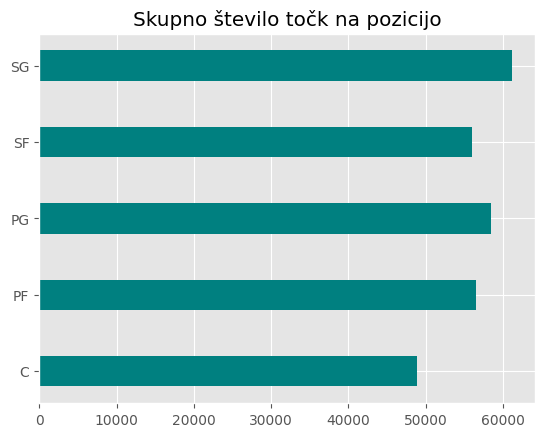

In [85]:
#pozicije = nba["Pos"]
#pozicije = set(pozicije)
#pozicije

def tocke(poz): 
    ustrezne_vrstice = nba[nba["Pos"] == poz]  
    skupne_tocke_na_pozicijo = ustrezne_vrstice["PTS"].sum()  
    return skupne_tocke_na_pozicijo

x = np.array(["C", "PF", "PG", "SF", "SG"])
y = np.array([tocke("C"), tocke("PF"), tocke("PG"), tocke("SF"), tocke("SG")])

plt.barh(x, y, height = 0.4)
plt.title("Skupno število točk na pozicijo")
plt.show()
